# Project 04


### Sophia Arackal


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


## Part 1: Loading the Dataset; Preliminary Analysis

In Part 1 section, I will load the forest_cover data into a DataFrame. I will explore the structure of the forest_cover data set.

In [2]:
fc = pd.read_csv('forest_cover.txt', sep='\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


I will determine the size of the forest_cover dataset. By using the df.shape, it will return a tuple, which represents the dimensionality of the DataFrame. After running fc.shape, I was able to determine that there are 15,120 rows and 13 columns. 

In [3]:
fc.shape

(15120, 13)

I will be inspecting the distribution of the Cover_types from fc.

In [4]:
fc.Cover_Type.value_counts().sort_index()



1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

I will be creating a list of seven colors to be used as a palette in plots that I will be creating later in this project. 

In [5]:

palette  = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']



## Part 2: Distribution of Cover Type by Wilderness Area

In Part 2 section, I will explore the relationship between cover type and wilderness area.

In [6]:

fc.Wilderness_Area.value_counts().sort_index()


Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

In the cell below, I will create a DataFrame to determine the how many regions of each cover type are in each of the four wilderness areas.

In [7]:

ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area']) 
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


In the cell below, I will visually represent the information in the ct_by_wa DataFrame as a stacked bar chart.

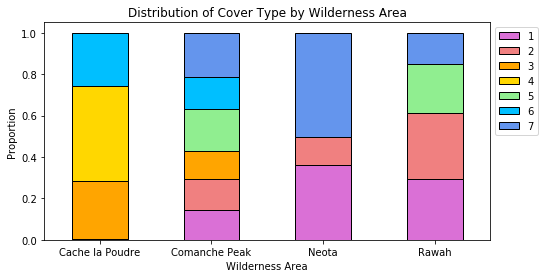

In [8]:

ct_by_wa_props =  ct_by_wa /  ct_by_wa.sum()


bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

ct_by_wa_props.transpose().plot(kind = 'bar', stacked = True, figsize = (8,4), color=palette, edgecolor = 'black')
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Distribution of Cover Type by Wilderness Area')
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.show()



##  Part 3: Distribution of Cover Type by Soil Type

In the Part 3 section, I will explore the relationship between cover type and soil type. I will create a DataFrame to
determine the number of regions of each cover type there are for each of the 40 soil types.

In [9]:

ct_by_st = pd.crosstab(fc['Cover_Type'], fc['Soil_Type']) 
ct_by_st


Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


In the cell below, I will visually represent the information in the ct_by_st DataFrame as a stacked bar chart.

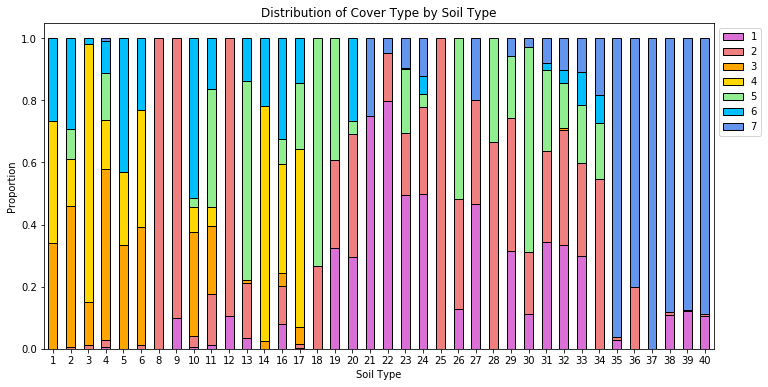

In [10]:

ct_by_st_props =  ct_by_st /  ct_by_st.sum()


bb = np.cumsum(ct_by_st_props) - ct_by_st_props


ct_by_st_props.transpose().plot(kind = 'bar', stacked = True, figsize = (12,6), color=palette, edgecolor = 'black')
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Distribution of Cover Type by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.show()



## Part 4: Distribution of Elevation by Cover Type

In Part 4 section, I will explore the relationship between cover type and elevation by calculating the average elevation for each of the seven cover types.


In [11]:

gb_Cover_Type = fc.loc[:, ['Elevation', 'Cover_Type']].\
                  groupby(['Cover_Type']).mean()
gb_Cover_Type



,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


I will create histograms to visually explore the distribution of elevations for each of the seven cover types.

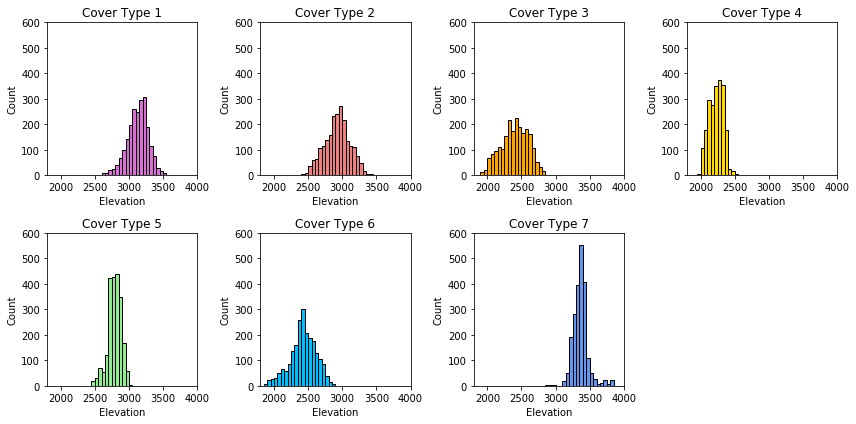

In [12]:
Cover_Type = [i for i in range(1,8)]
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']


plt.figure(figsize = [12,6])
for i, c in enumerate(Cover_Type):
    plt.subplot(2,4,i+1)
    plt.hist(fc.loc[fc['Cover_Type']==c, 'Elevation'], edgecolor='k', color= palette[i],
    bins=np.arange(1800, 4050, 50))
    plt.xlim([1800,4000])
    plt.ylim([0,600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    plt.title ('Cover Type ' + str(Cover_Type[i]))

plt.tight_layout()
plt.show()


## Part 5: Creating Training, Validation, and Test Sets

In Part 5 section, I will separate the categorical features, the numerical features, and the labels. I will create training, validation, and test sets.


In [13]:

Xnum = fc.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values
Xcat = fc.iloc[:, [10, 11]].values.astype('str')
y = fc.iloc[:, 12].values



In [14]:
print('Numerical Feature Array Shape:  ',  Xnum.shape)
print('Categorical Feature Array Shape:', Xcat.shape)
print('Label Array Shape:              ',  y.shape)

Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)


In the cell below, I will be encoding the categorical variables using one-hot encoding.

In [15]:

encoder = OneHotEncoder(sparse=False)
encoder.fit(Xcat)
Xenc   = encoder.transform(Xcat)

print('Encoded Feature Array Shape: ',  Xenc.shape)    

Encoded Feature Array Shape:  (15120, 42)


In the cell below, I will combine the numerical features with the encoded features.

In [16]:

X = np.hstack([Xnum, Xenc])

print('Feature Array Shape: ', X.shape)    

Feature Array Shape:  (15120, 52)


In the cell below, I will split the data into training, validation, and test sets, using a 70/15/15 split.

In [17]:

X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size = 0.5, random_state=1, stratify=y_hold)

print('Training Features Shape:   ', X_train.shape) 
print('Validation Features Shape: ', X_valid.shape) 
print('Test Features Shape:       ', X_test.shape) 



Training Features Shape:    (10584, 52)
Validation Features Shape:  (2268, 52)
Test Features Shape:        (2268, 52)


## Part 6: Logistic Regression Model

In Part 6 section, I will create and evaluate a logistic regression model.


In [18]:

lr_mod = LogisticRegression(solver='lbfgs', penalty='none', multi_class='multinomial', max_iter = 1000)
lr_mod.fit(X_train, y_train)

print('Training Accuracy:  ', round(lr_mod.score(X_train, y_train),4))
print('Validation Accuracy:', round(lr_mod.score(X_valid, y_valid),4))

Training Accuracy:   0.6134
Validation Accuracy: 0.6098


C:\Users\Busaba\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Part 7: Decision Tree Models

In Part 7 section, I will create and evaluate several decision tree models, in which each with a different value for the max_depth parameter. For each parameter value, I will calculate the training and validation accuracy. I will use the validation scores to select the optimal value for max_depth.

In [19]:

dt_train_acc = []
dt_valid_acc = []

depth_range = range(2,30)

for d in depth_range:
    temp_tree = DecisionTreeClassifier(max_depth=d, random_state=1)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))

dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]


tree_model = DecisionTreeClassifier(max_depth = dt_opt_depth, random_state=1)
tree_model.fit(X_train, y_train)

print('Optimal Value of max_depth:            ', dt_opt_depth)
print('Training Accuracy for Optimal Model:   ', round(tree_model.score(X_train, y_train),4))
print('Validation Accuracy for Optimal Model: ', round(tree_model.score(X_valid, y_valid),4))


Optimal Value of max_depth:             19
Training Accuracy for Optimal Model:    0.9857
Validation Accuracy for Optimal Model:  0.7743


In the cell below, I will plot the training and validation curves as a function of max_depth.

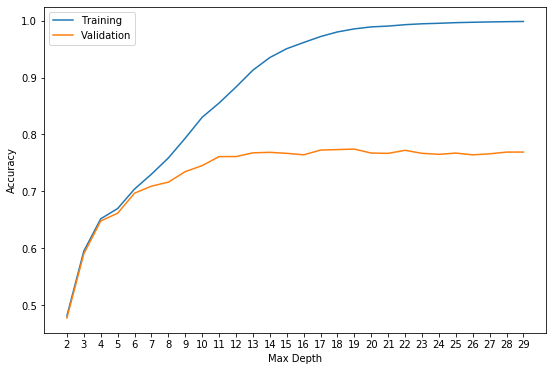

In [20]:

plt.figure(figsize=([9, 6]))
plt.plot(depth_range, dt_train_acc , label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()
plt.show()


## Part 8: Random Forest Models

In Part 8 section, I will create and evaluate several random forest models, in which each with a different value for the max_depth parameter. 

In [21]:

rf_train_acc = []
rf_valid_acc = []
depth_range = range(2,30)

for d in depth_range:
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=1)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))

rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

forest_mod = RandomForestClassifier(n_estimators=100, max_depth=rf_opt_depth, random_state=1)
forest_mod.fit(X_train, y_train)


print('Optimal Value of max_depth:             ', rf_opt_depth)
print('Training Accuracy for Optimal Model:    ', round(forest_mod.score(X_train, y_train),4))
print('Validation Accuracy for Optimal Model:  ', round(forest_mod.score(X_valid, y_valid),4))


Optimal Value of max_depth:              28
Training Accuracy for Optimal Model:     1.0
Validation Accuracy for Optimal Model:   0.8686


In the cell below, I will plot the training and validation curves as a function of max_depth.

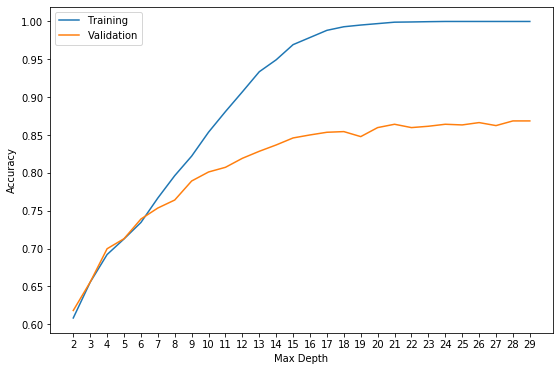

In [22]:

plt.figure(figsize=([9, 6]))
plt.plot(depth_range, rf_train_acc , label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()
plt.show()


## Part 9: Create and Evaluate Final Model

In Part 9 section, I will select my final model, and will evaluate it on the test set. I will evaluate the three types of models (logistic regression, decision tree, or random forest) and determine which one I will use as my final model, and state what parameter values I will use. From these three models, I wil select the model that gives me the best performance on the validation set. 


In [23]:
#testing the other models

#Logisitic Model
print('Training Accuracy for Logistic Model:  ', round(lr_mod.score(X_train, y_train),4))
print('Validation Accuracy for Logistic Model:', round(lr_mod.score(X_valid, y_valid),4))
print('Testing Accuracy for Logistic Model:   ', round(lr_mod.score(X_test, y_test),4))
print('')
#Decision Tree Model
print('Training Accuracy for Decision Tree Model:   ', round(tree_model.score(X_train, y_train),4))
print('Validation Accuracy for Decision Tree Model: ', round(tree_model.score(X_valid, y_valid),4))
print('Testing Accuracy for Decision Tree Model:    ', round(tree_model.score(X_test, y_test),4))
print('')

#I decided Random Forest is my Final Model due to the best accuracy values for train, validation, and test data sets.

final_model = RandomForestClassifier(n_estimators=100, max_depth=rf_opt_depth, random_state=1)
final_model.fit(X_train, y_train)

print('Training Accuracy for Final Model:  ', round(final_model.score(X_train, y_train),4))
print('Validation Accuracy for Final Model:', round(final_model.score(X_valid, y_valid),4))
print('Testing Accuracy for Final Model:   ', round(final_model.score(X_test, y_test),4))
      


Training Accuracy for Logistic Model:   0.6134
Validation Accuracy for Logistic Model: 0.6098
Testing Accuracy for Logistic Model:    0.6063

Training Accuracy for Decision Tree Model:    0.9857
Validation Accuracy for Decision Tree Model:  0.7743
Testing Accuracy for Decision Tree Model:     0.7928

Training Accuracy for Final Model:   1.0
Validation Accuracy for Final Model: 0.8686
Testing Accuracy for Final Model:    0.8611


In the cell below, I will create and display a confusion matrix detailing the random forest model's performance on the test set.

In [24]:

test_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, test_pred)

cm_df = pd.DataFrame(cm)
cm_df


,0,1,2,3,4,5,6
0,240,57,2,0,6,0,19
1,59,233,6,0,12,11,3
2,0,0,267,17,2,38,0
3,0,0,7,314,0,3,0
4,0,10,5,0,305,4,0
5,0,0,33,10,1,280,0
6,10,0,0,0,0,0,314


In the cell below, I will be creating a classification report to gain a better understanding of the random forest model's performance on the test set.

In [25]:

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76       324
           2       0.78      0.72      0.75       324
           3       0.83      0.82      0.83       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.86      0.85       324
           7       0.93      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

